# Data Pre-processing

### Step 1 -  Load data and Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar
from datetime import date, timedelta
# import package to ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('df.csv', index_col = 0)
df.columns = df.columns.str.replace(' ', '_')

In [3]:
df.columns

Index(['MLS_No', 'Status', 'Address', 'Unit', 'DOM', 'City', 'LP', 'SP', 'BT',
       'SqFt', 'BR', 'Bth', 'Gar', 'GarSp', 'YrBlt', 'HOA_Fee', 'Freq',
       'Closing_Date', 'Age', 'Area', 'Zip'],
      dtype='object')

### Step 2 - Remove irrelevant columns
We decide to drop irrelevant columns where 'MLS No' and 'Address' are unique of each property, and'Status' and 'City' are same for all properties. And since the type of the values 'Unit' are hard to unify and there are too many missing value for 'Unit', we also decide to drop it.

In [4]:
# we first remove irrelevant columns from our data set
df = df.drop(columns = ['MLS_No', 'Status', 'Address', 'Unit','City'])

### Step 3 - Identify Categorical and Numerical categories 

In [5]:
num = ['DOM', 'LP', 'SP', 'SqFt', 'Age', 'HOA_Fee']

### Step 4 - Convert data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DOM           10000 non-null  int64  
 1   LP            10000 non-null  object 
 2   SP            10000 non-null  object 
 3   BT            10000 non-null  object 
 4   SqFt          10000 non-null  int64  
 5   BR            10000 non-null  int64  
 6   Bth           10000 non-null  int64  
 7   Gar           8103 non-null   object 
 8   GarSp         9990 non-null   float64
 9   YrBlt         9995 non-null   float64
 10  HOA_Fee       6013 non-null   object 
 11  Freq          2658 non-null   object 
 12  Closing_Date  10000 non-null  object 
 13  Age           9990 non-null   float64
 14  Area          10000 non-null  object 
 15  Zip           10000 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.3+ MB


In [7]:
# change the type of LP, SP, HOA Fee to numeric
def remove(text):
    return text.replace('$','')
def removedot(text):
    return text.replace(',','')
df['LP'] = pd.to_numeric(df['LP'].apply(remove).apply(removedot))
df['SP'] = pd.to_numeric(df['SP'].apply(remove).apply(removedot))

df['HOA_Fee'] = df['HOA_Fee'].str.replace(',','').apply(float)

# Data Processing

### Step 1 - Check data duplication

In [8]:
#check if there is duplicated line
print('Number of Duplicated rows:',sum(df.duplicated()))

Number of Duplicated rows: 0


### Step 2 - Split data set

In [9]:
# Change closing date to datetime
df['Closing_Date'] = pd.to_datetime(df['Closing_Date'])
df = df.sort_values(by = 'Closing_Date', ignore_index=True)

# pre-split of train and test set, where first 70% of data to train (by closing data) and 30% recent data to test
train = df.iloc[0:7000]
test = df.iloc[7000:].reset_index(drop = True)
train.to_csv('train.csv')
test.to_csv('test.csv')

In [10]:
train

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,17,769000,759000,CO,1257,2,2,Y,2.0,1999.0,341.0,NaN,2019-01-02,19.0,Santa Teresa,95138
1,0,750000,750000,TH,1444,2,2,Y,2.0,1979.0,350.0,NaN,2019-01-02,39.0,Berryessa,95131
2,7,750000,785000,TH,1655,3,2,Y,2.0,1982.0,445.0,NaN,2019-01-02,36.0,Santa Teresa,95139
3,15,674888,723000,DE,1408,3,3,NaN,0.0,1953.0,NaN,NaN,2019-01-02,65.0,Alum Rock,95127
4,51,649000,636000,CO,922,2,2,NaN,0.0,1988.0,460.0,NaN,2019-01-02,30.0,Campbell,95128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,7,985000,1108000,DE,1260,3,2,Y,2.0,1955.0,NaN,NaN,2020-12-22,65.0,Santa Clara County,95124
6996,4,849000,822000,CO,1622,2,2,Y,2.0,1998.0,726.0,M,2020-12-22,22.0,Central San Jose,95112
6997,1,715000,766000,CO,1168,2,2,Y,2.0,1996.0,260.0,M,2020-12-22,24.0,South San Jose,95136
6998,9,887999,894000,DE,1568,4,2,Y,2.0,1998.0,50.0,M,2020-12-22,22.0,South San Jose,95111


In [11]:
test

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,210.0,M,2020-12-22,7.0,Berryessa,95132
1,6,799999,935000,DE,1398,4,2,Y,2.0,1971.0,NaN,NaN,2020-12-22,49.0,Evergreen,95148
2,11,799998,860000,DE,1353,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Alum Rock,95127
3,25,549000,550000,CO,1094,2,2,NaN,0.0,1991.0,463.0,M,2020-12-23,29.0,South San Jose,95122
4,10,949000,985000,DE,1065,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Blossom Valley,95123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,28,619000,620000,CO,850,2,2,Y,1.0,1992.0,349.0,M,2021-10-08,29.0,Santa Teresa,95138
2996,18,888000,912000,DE,1272,3,2,Y,2.0,1915.0,NaN,NaN,2021-10-08,106.0,Central San Jose,95116
2997,33,739950,735000,CO,1006,2,2,NaN,0.0,1991.0,400.0,M,2021-10-08,30.0,Campbell,95128
2998,5,667053,675000,CO,1233,2,2,Y,1.0,1985.0,535.0,M,2021-10-08,36.0,Blossom Valley,95123


### Step 3 - Process missing data

In [12]:
#Train Data
#Garage - categorize null as a category
train['Gar'] = train['Gar'].fillna('N/A')
#Frequency - convert missing as a category
train['Freq'] = train['Freq'].fillna('N/A')
#Garage Space - drop rows with missing value
#Year Built - drop rows with missing value
train = train.dropna(subset=['GarSp','YrBlt'])

#HOA Fee 
for i in  train.index:
    if math.isnan(train.loc[i,'HOA_Fee']):
        # impute using means for condo and townhouse
        if train.loc[i,'BT'] == 'CO':
            train.loc[i,'HOA_Fee'] = train.loc[train['BT']=='CO','HOA_Fee'].mean()
        if train.loc[i,'BT'] == 'TH':
            train.loc[i,'HOA_Fee'] = train.loc[train['BT']=='TH','HOA_Fee'].mean()
        # input 0 to all other building types 
        else:
            train.loc[i,'HOA_Fee'] = 0

#summarize train data set
print(train.info())
#preview data set
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DOM           6990 non-null   int64         
 1   LP            6990 non-null   int64         
 2   SP            6990 non-null   int64         
 3   BT            6990 non-null   object        
 4   SqFt          6990 non-null   int64         
 5   BR            6990 non-null   int64         
 6   Bth           6990 non-null   int64         
 7   Gar           6990 non-null   object        
 8   GarSp         6990 non-null   float64       
 9   YrBlt         6990 non-null   float64       
 10  HOA_Fee       6990 non-null   float64       
 11  Freq          6990 non-null   object        
 12  Closing_Date  6990 non-null   datetime64[ns]
 13  Age           6988 non-null   float64       
 14  Area          6990 non-null   object        
 15  Zip           6990 non-null   object  

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,17,769000,759000,CO,1257,2,2,Y,2.0,1999.0,341.0,N/A,2019-01-02,19.0,Santa Teresa,95138
1,0,750000,750000,TH,1444,2,2,Y,2.0,1979.0,350.0,N/A,2019-01-02,39.0,Berryessa,95131
2,7,750000,785000,TH,1655,3,2,Y,2.0,1982.0,445.0,N/A,2019-01-02,36.0,Santa Teresa,95139
3,15,674888,723000,DE,1408,3,3,N/A,0.0,1953.0,0.0,N/A,2019-01-02,65.0,Alum Rock,95127
4,51,649000,636000,CO,922,2,2,N/A,0.0,1988.0,460.0,N/A,2019-01-02,30.0,Campbell,95128


In [13]:
test.head()

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,210.0,M,2020-12-22,7.0,Berryessa,95132
1,6,799999,935000,DE,1398,4,2,Y,2.0,1971.0,NaN,NaN,2020-12-22,49.0,Evergreen,95148
2,11,799998,860000,DE,1353,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Alum Rock,95127
3,25,549000,550000,CO,1094,2,2,NaN,0.0,1991.0,463.0,M,2020-12-23,29.0,South San Jose,95122
4,10,949000,985000,DE,1065,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Blossom Valley,95123


In [14]:
#Test Data
#Garage - categorize null as a category
test['Gar'] = test['Gar'].fillna('N/A')
#Frequency - convert missing as a category
test['Freq'] = test['Freq'].fillna('N/A')
#Garage Space - drop rows with missing value
#Year Built - drop rows with missing value
test = test.dropna(subset=['GarSp','YrBlt'])

#HOA Fee 
for i in test.index:
    if math.isnan(test.loc[i,'HOA_Fee']):
        # impute using means for condo and townhouse
        if test.loc[i,'BT'] == 'CO':
            test.loc[i,'HOA_Fee'] = train.loc[train['BT']=='CO','HOA_Fee'].mean()
        if test.loc[i,'BT'] == 'TH':
            test.loc[i,'HOA_Fee'] = train.loc[train['BT']=='TH','HOA_Fee'].mean()
        # input 0 to all other building types 
        else:
            test.loc[i,'HOA_Fee'] = 0
            
#summarize test data set
print(test.info())
#preview data set
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DOM           2996 non-null   int64         
 1   LP            2996 non-null   int64         
 2   SP            2996 non-null   int64         
 3   BT            2996 non-null   object        
 4   SqFt          2996 non-null   int64         
 5   BR            2996 non-null   int64         
 6   Bth           2996 non-null   int64         
 7   Gar           2996 non-null   object        
 8   GarSp         2996 non-null   float64       
 9   YrBlt         2996 non-null   float64       
 10  HOA_Fee       2996 non-null   float64       
 11  Freq          2996 non-null   object        
 12  Closing_Date  2996 non-null   datetime64[ns]
 13  Age           2996 non-null   float64       
 14  Area          2996 non-null   object        
 15  Zip           2996 non-null   object  

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,210.0,M,2020-12-22,7.0,Berryessa,95132
1,6,799999,935000,DE,1398,4,2,Y,2.0,1971.0,0.0,N/A,2020-12-22,49.0,Evergreen,95148
2,11,799998,860000,DE,1353,3,2,Y,2.0,1971.0,0.0,N/A,2020-12-23,49.0,Alum Rock,95127
3,25,549000,550000,CO,1094,2,2,N/A,0.0,1991.0,463.0,M,2020-12-23,29.0,South San Jose,95122
4,10,949000,985000,DE,1065,3,2,Y,2.0,1971.0,0.0,N/A,2020-12-23,49.0,Blossom Valley,95123


### Step 4 - Data Cleaning

In [15]:
# clean zipcode in training set - use the first 5 digits
train['Zip'] = train['Zip'].values.astype(str)
train['Zip'] = train['Zip'].apply(lambda x: x[0:5])

# clean zipcode in testing set - use the first 5 digits
test['Zip'] = test['Zip'].values.astype(str)
test['Zip'] = test['Zip'].apply(lambda x: x[0:5])

In [16]:
# drop testset with zip == 94556 since training set does not contain that zip number
test = test.drop(test[test['Zip'] == '94556'].index)

In [17]:
# clean BT 
# count the number of occurence for each building type
train.groupby("BT").size()

BT
CO    2459
DE    3328
DU      14
PV       1
TH    1188
dtype: int64

In [18]:
test.groupby("BT").size()

BT
CO    1418
DE     911
DU       3
TH     663
dtype: int64

Remove the row with type "PV" as it only appear once in our dataset and there are not sufficient explanation for what "PV" stands for from Google and consultant.

In [19]:
# drop the row with "PV"
train = train[train["BT"] != "PV"]

In [20]:
# combine "DE" and "DU", label them as "SFH"  as they are both single family house
train["BT"].replace("DE","SFH",inplace = True)
train["BT"].replace("DU","SFH",inplace = True)

test["BT"].replace("DE","SFH",inplace = True)
test["BT"].replace("DU","SFH",inplace = True)

In [21]:
# drop rows in test sets with 'Freq_B', 'Freq_Q', 
test = test.drop(test[test['Freq'] == 'B'].index)
test = test.drop(test[test['Freq'] == 'Q'].index)

In [22]:
# check how many unique areas we have in San Jose
train['Area'].unique()

array(['Santa Teresa', 'Berryessa', 'Alum Rock', 'Campbell',
       'Blossom Valley', 'Evergreen', 'Cambrian', 'Willow Glen',
       'Central San Jose', 'South San Jose', 'Santa Clara County',
       'Cupertino', 'Almaden Valley', 'Alviso (Santa Clara County)',
       'Santa Clara', 'All Other Counties/States'], dtype=object)

In [23]:
# check the different naming of area (containing San Jose) with same zip code
train.loc[train['Area'].str.contains('San Jose')].groupby(['Zip','Area']).size()

Zip    Area            
95110  Central San Jose    222
95111  South San Jose      480
95112  Central San Jose    382
       South San Jose        8
95113  Central San Jose     24
95116  Central San Jose     68
       South San Jose       28
95121  South San Jose       97
95122  South San Jose      131
95125  South San Jose       27
95126  Central San Jose    196
95128  Central San Jose     93
95131  Central San Jose      1
95136  South San Jose      180
dtype: int64

In [24]:
# drop rows which include San Jose and SJOS - San Jose (train set do not contain)
test = test.drop(test[test['Area'] == 'San Jose'].index)
test = test.drop(test[test['Area'] == 'SJOS - San Jose'].index)

In [25]:
# check the different naming of area (containing Santa Clara) with same zip code
train.loc[train['Area'].str.contains('Santa Clara')].groupby(['Zip','Area']).size()

Zip    Area                       
95002  Alviso (Santa Clara County)     2
95110  Santa Clara County             16
95111  Santa Clara                     1
       Santa Clara County             33
95112  Santa Clara County             13
95116  Santa Clara County             18
95117  Santa Clara County              3
95118  Santa Clara County              7
95119  Santa Clara County              3
95121  Santa Clara                     1
       Santa Clara County             11
95122  Santa Clara                     3
       Santa Clara County             19
95123  Santa Clara County             36
95124  Santa Clara                     1
       Santa Clara County              3
95125  Santa Clara County             10
95126  Santa Clara                    34
       Santa Clara County              5
95127  Santa Clara                     1
       Santa Clara County             36
95128  Santa Clara                    12
       Santa Clara County              6
95129  Santa Clara Cou

In [26]:
# Unify all area containing Santa Clara to 'Santa Clara County'
train['Area'][train['Area'].str.contains('Santa Clara')] = 'Santa Clara County'
test['Area'][test['Area'].str.contains('Santa Clara')] = 'Santa Clara County'

### Step 5 - Outlier Detection

In [27]:
def outlier_index(array):
    upper = array.mean() + 3*array.std()
    lower = array.mean() - 3*array.std()
    return list(np.where(array > upper)[0]) + list(np.where(array < lower)[0])

In [28]:
for feature in num:
    print('feature '+ feature +' has '+str(len(outlier_index(train[feature]))) + ' outliers')

feature DOM has 141 outliers
feature LP has 0 outliers
feature SP has 1 outliers
feature SqFt has 40 outliers
feature Age has 108 outliers
feature HOA_Fee has 98 outliers


In [29]:
train['Age'].describe()

count    6987.000000
mean       42.794332
std        21.656168
min         0.000000
25%        31.000000
50%        43.000000
75%        53.000000
max       132.000000
Name: Age, dtype: float64

(array([ 644.,  789., 1583., 2172., 1059.,  385.,   97.,  144.,   83.,
          31.]),
 array([  0. ,  13.2,  26.4,  39.6,  52.8,  66. ,  79.2,  92.4, 105.6,
        118.8, 132. ]),
 <BarContainer object of 10 artists>)

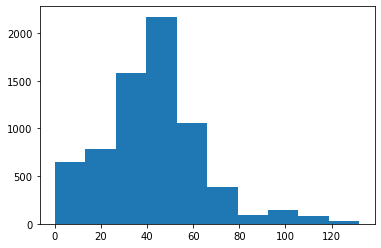

In [30]:
plt.hist(train['Age'])

In [31]:
# move outlier

def outlier_index(array):
    upper = array.mean() + 3*array.std()
    lower = array.mean() - 3*array.std()
    return list(np.where(array > upper)[0]) + list(np.where(array < lower)[0])

train.reset_index(inplace = True,drop = True)

index_set = []
for feature in num:
    print('feature '+ feature +' has '+str(len(outlier_index(train[feature]))) + ' outliers')
    index_set.extend(outlier_index(train[feature]))
    
train.drop(index_set, inplace = True)
train.reset_index(inplace = True,drop = True)

feature DOM has 141 outliers
feature LP has 0 outliers
feature SP has 1 outliers
feature SqFt has 40 outliers
feature Age has 108 outliers
feature HOA_Fee has 98 outliers


# Data Engineering: 

In [32]:
# Age - fill with the time difference in year between YrBlt and Closing Date
train['Age'] = train['Age'].fillna(pd.DatetimeIndex(train['Closing_Date']).year - train['YrBlt'])
test['Age'] = test['Age'].fillna(pd.DatetimeIndex(test['Closing_Date']).year - test['YrBlt'])

In [33]:
# move closing date to 30 ealier as Accept_date
train['Accept_Date'] = train['Closing_Date'] -  pd.to_timedelta(30, unit='d')
test['Accept_Date'] = test['Closing_Date'] -  pd.to_timedelta(30, unit='d')

In [34]:
# extract month and data from closing data
train['Month_Accept_Date'] = train['Accept_Date'].dt.month
test['Month_Accept_Date'] = test['Accept_Date'].dt.month

# since test set does not have month of accpet date in Oct, add a Oct column in test set equal to 0
test["Month_Accept_Date_Oct"] = [0] * len(test)

In [35]:
import math

# write a function to calculate the week number given feature name
def add_week_of_month(df,feature):
    df['Week_in_month_'+feature] = pd.to_numeric(df[feature].dt.day/7)
    df['Week_in_month_'+feature] = df['Week_in_month_'+feature].apply(lambda x: math.ceil(x))
    return df

In [36]:
# create week of month for closing date for train set
train = add_week_of_month(train,'Accept_Date')

In [37]:
# create week of month for closing date for test set
test = add_week_of_month(test,'Accept_Date')

In [38]:
#create listing date
train['Listing_Date'] = train['Closing_Date'] -  pd.to_timedelta(train['DOM'], unit='d')
test['Listing_Date'] = test['Closing_Date'] -  pd.to_timedelta(test['DOM'], unit='d')

In [39]:
# extract month and data from Listing data
train['Month_Listing_Date'] = train['Listing_Date'].dt.month
test['Month_Listing_Date'] = test['Listing_Date'].dt.month
# create week of month for Listing Date 
train = add_week_of_month(train,'Listing_Date')
test = add_week_of_month(test,'Listing_Date')

In [40]:
# change month to abbrieviated month name
train['Month_Accept_Date'] = train['Month_Accept_Date'].apply(lambda x: calendar.month_abbr[x])
train['Month_Listing_Date'] = train['Month_Listing_Date'].apply(lambda x: calendar.month_abbr[x])
test['Month_Accept_Date'] = test['Month_Accept_Date'].apply(lambda x: calendar.month_abbr[x])
test['Month_Listing_Date'] = test['Month_Listing_Date'].apply(lambda x: calendar.month_abbr[x])

In [41]:
train.groupby('Age').size()

Age
0.0      53
1.0      24
2.0      31
3.0      66
4.0      41
         ..
103.0     2
104.0     3
105.0    11
106.0     2
107.0     4
Length: 108, dtype: int64

In [42]:
# drop columns which information already showen in other freatures
train = train.drop(columns = ['YrBlt','Closing_Date','Accept_Date','Listing_Date'])
test = test.drop(columns = ['YrBlt','Closing_Date','Accept_Date','Listing_Date'])

In [43]:
# export train and test set
train.to_csv('train.csv')
test.to_csv('test.csv')

In [44]:
check = pd.read_csv('train.csv')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6616 entries, 0 to 6615
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DOM                         6616 non-null   int64  
 1   LP                          6616 non-null   int64  
 2   SP                          6616 non-null   int64  
 3   BT                          6616 non-null   object 
 4   SqFt                        6616 non-null   int64  
 5   BR                          6616 non-null   int64  
 6   Bth                         6616 non-null   int64  
 7   Gar                         6616 non-null   object 
 8   GarSp                       6616 non-null   float64
 9   HOA_Fee                     6616 non-null   float64
 10  Freq                        6616 non-null   object 
 11  Age                         6616 non-null   float64
 12  Area                        6616 non-null   object 
 13  Zip                         6616 

In [46]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6616 entries, 0 to 6615
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  6616 non-null   int64  
 1   DOM                         6616 non-null   int64  
 2   LP                          6616 non-null   int64  
 3   SP                          6616 non-null   int64  
 4   BT                          6616 non-null   object 
 5   SqFt                        6616 non-null   int64  
 6   BR                          6616 non-null   int64  
 7   Bth                         6616 non-null   int64  
 8   Gar                         5493 non-null   object 
 9   GarSp                       6616 non-null   float64
 10  HOA_Fee                     6616 non-null   float64
 11  Freq                        899 non-null    object 
 12  Age                         6616 non-null   float64
 13  Area                        6616 

# Data Visualization

In [47]:
# import package for linear regression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from matplotlib.pyplot import figure
import matplotlib

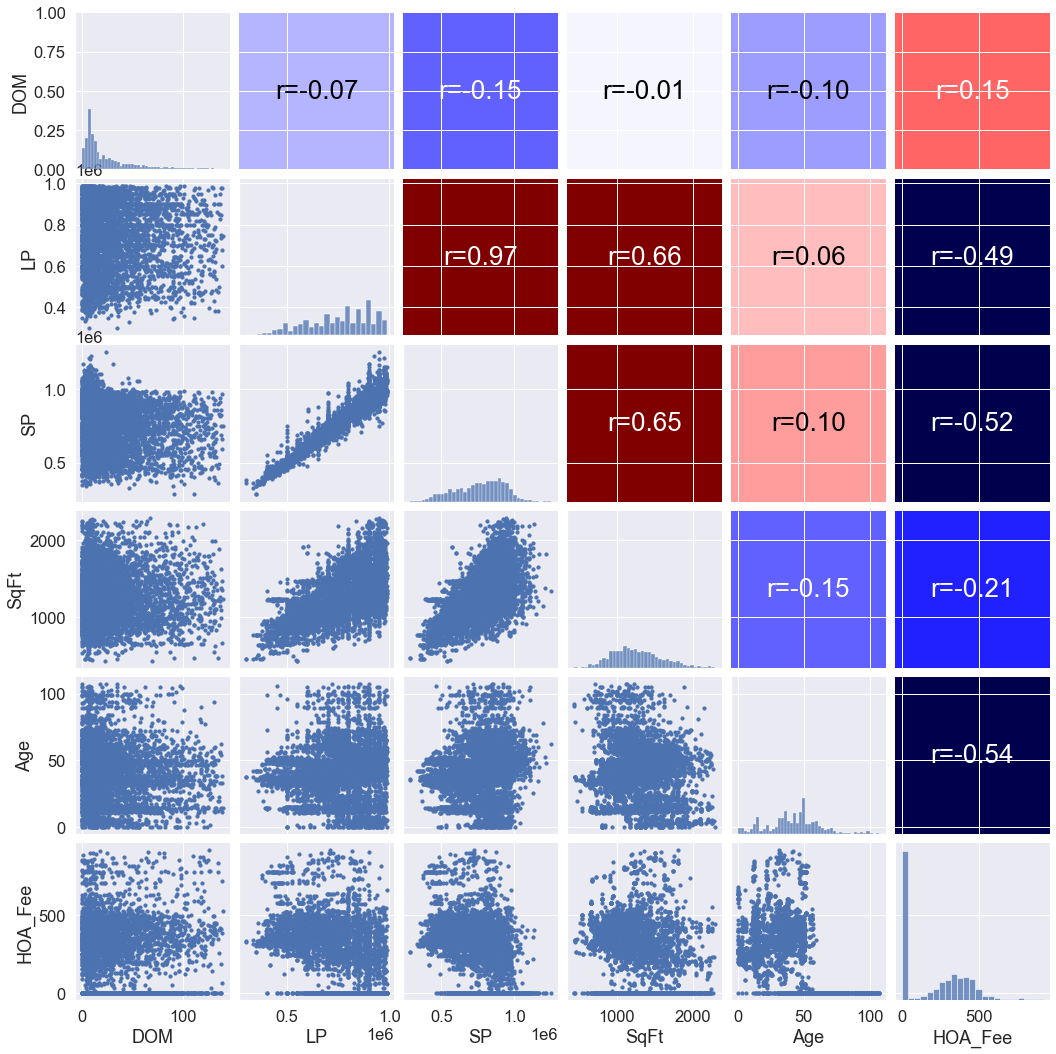

In [48]:
plt.rcParams['figure.figsize'] = 10,10

# plot heat map for numeric features
#https://stackoverflow.com/questions/66108908/how-to-combine-a-pairplot-and-a-triangular-heatmap
def corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3]) ) / 2
    ax.annotate(f"r={r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=26, ha='center', va='center')

num = ['DOM', 'LP', 'SP', 'SqFt', 'Age', 'HOA_Fee']
heatmap = train[num]
sns.set(font_scale=1.5)
g = sns.PairGrid(heatmap)
g.map_lower(plt.scatter, s=10)
g.map_diag(sns.histplot, kde=False)
g.map_upper(corrfunc, cmap=plt.get_cmap('seismic'), norm=plt.Normalize(vmin=-.5, vmax=.5))
g.fig.subplots_adjust(wspace=0.06, hspace=0.06) # equal spacing in both directions
#g.fig.suptitle('Relationship of Features')
plt.show()
g.savefig('heatmap.png') 

# Model Training and Modeling

### Part I - Liner Regression

In [49]:
# split between dependent and independent variables
train_X = train.drop(columns = ['SP'])
train_y = train['SP']
test_X = test.drop(columns = ['SP'])
test_y = test['SP']

In [50]:
train_X

,DOM,LP,BT,SqFt,BR,Bth,Gar,GarSp,HOA_Fee,Freq,Age,Area,Zip,Month_Accept_Date,Week_in_month_Accept_Date,Month_Listing_Date,Week_in_month_Listing_Date
0,17,769000,CO,1257,2,2,Y,2.0,341.0,N/A,19.0,Santa Teresa,95138,Dec,1,Dec,3
1,0,750000,TH,1444,2,2,Y,2.0,350.0,N/A,39.0,Berryessa,95131,Dec,1,Jan,1
2,7,750000,TH,1655,3,2,Y,2.0,445.0,N/A,36.0,Santa Teresa,95139,Dec,1,Dec,4
3,15,674888,SFH,1408,3,3,N/A,0.0,0.0,N/A,65.0,Alum Rock,95127,Dec,1,Dec,3
4,51,649000,CO,922,2,2,N/A,0.0,460.0,N/A,30.0,Campbell,95128,Dec,1,Nov,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6611,7,985000,SFH,1260,3,2,Y,2.0,0.0,N/A,65.0,Santa Clara County,95124,Nov,4,Dec,3
6612,4,849000,CO,1622,2,2,Y,2.0,726.0,M,22.0,Central San Jose,95112,Nov,4,Dec,3
6613,1,715000,CO,1168,2,2,Y,2.0,260.0,M,24.0,South San Jose,95136,Nov,4,Dec,3
6614,9,887999,SFH,1568,4,2,Y,2.0,50.0,M,22.0,South San Jose,95111,Nov,4,Dec,2


In [51]:
train_X.Zip.unique()

array(['95138', '95131', '95139', '95127', '95128', '95123', '95121',
       '95118', '95125', '95136', '95112', '95117', '95122', '95133',
       '95132', '95111', '95119', '95116', '95126', '95129', '95124',
       '95148', '95110', '95135', '95120', '95134', '95002', '95113',
       '95140', '95130'], dtype=object)

In [52]:
#check VIF for numeric features
def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values  # the dataframe passed to VIF must include the intercept term. We add it the same way we did before.
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)
numeric = ['DOM', 'LP', 'SqFt','BR','Bth','GarSp', 'HOA_Fee','Age','Week_in_month_Accept_Date', 'Week_in_month_Listing_Date']
VIF(train_X, numeric)

DOM                           1.027110
LP                            2.550922
SqFt                          3.198056
BR                            3.009452
Bth                           1.985865
GarSp                         1.423146
HOA_Fee                       2.464837
Age                           1.874551
Week_in_month_Accept_Date     1.002021
Week_in_month_Listing_Date    1.001233
dtype: float64

In [53]:
# create formula
col = train.drop(columns = ['SP'])
f = 'SP ~ ' + ' + '.join(col)

In [54]:
#model building
model = smf.ols(formula = f,data = train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     SP   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1627.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:37:55   Log-Likelihood:                -78762.
No. Observations:                6616   AIC:                         1.577e+05
Df Residuals:                    6536   BIC:                         1.582e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

([<matplotlib.axis.YTick at 0x12abd9fd0>,
 [Text(0, 0, 'BT[T.SFH]'),
  Text(0, 1, 'BT[T.TH]'),
  Text(0, 2, 'Gar[T.N/A]'),
  Text(0, 3, 'Gar[T.Y]'),
  Text(0, 4, 'Freq[T.M]'),
  Text(0, 5, 'Freq[T.N/A]'),
  Text(0, 6, 'Area[T.Almaden Valley]'),
  Text(0, 7, 'Area[T.Alum Rock]'),
  Text(0, 8, 'Area[T.Berryessa]'),
  Text(0, 9, 'Area[T.Blossom Valley]'),
  Text(0, 10, 'Area[T.Cambrian]'),
  Text(0, 11, 'Area[T.Campbell]'),
  Text(0, 12, 'Area[T.Central San Jose]'),
  Text(0, 13, 'Area[T.Cupertino]'),
  Text(0, 14, 'Area[T.Evergreen]'),
  Text(0, 15, 'Area[T.Santa Clara County]'),
  Text(0, 16, 'Area[T.Santa Teresa]'),
  Text(0, 17, 'Area[T.South San Jose]'),
  Text(0, 18, 'Area[T.Willow Glen]'),
  Text(0, 19, 'Zip[T.95110]'),
  Text(0, 20, 'Zip[T.95111]'),
  Text(0, 21, 'Zip[T.95112]'),
  Text(0, 22, 'Zip[T.95113]'),
  Text(0, 23, 'Zip[T.95116]'),
  Text(0, 24, 'Zip[T.95117]'),
  Text(0, 25, 'Zip[T.95118]'),
  Text(0, 26, 'Zip[T.95119]'),
  Text(0, 27, 'Zip[T.95120]'),
  Text(0, 28, 'Zip

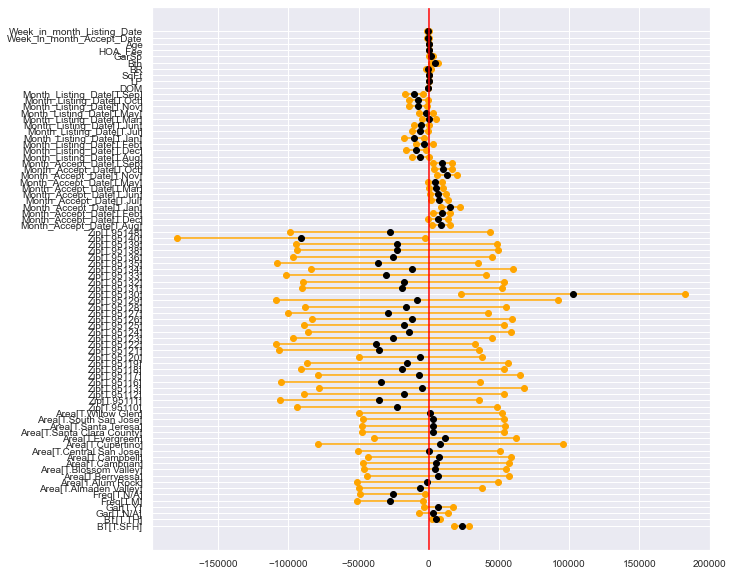

In [55]:
# plot feature significant
data_dict = {}
data_dict['category'] = list(model.params.to_dict().keys())[1:]
data_dict['lower'] = model.conf_int()[0][1:]
data_dict['upper'] = model.conf_int()[1][1:]
data_dict['coef'] = model.params[1:]
dataset = pd.DataFrame(data_dict)

figure(figsize=(10, 10))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
for lower,upper,coef,y in zip(dataset['lower'],dataset['upper'], dataset['coef'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')

plt.plot(dataset['coef'], range(len(dataset)), 'ro',color = 'black')
plt.axvline(x = 0, color = 'red')
plt.yticks(range(len(dataset)),list(dataset['category']))

In [56]:
#drop Gar, Freq, BR, GarSp, GarSp, Age, Week_in_month_Accept_date due to not significant

# create formula
col = train.drop(columns = ['SP','Gar', 'Freq', 'BR', 'GarSp', 'Age', 'Week_in_month_Accept_Date'])
f = 'SP ~ ' + ' + '.join(col)
#model building
model = smf.ols(formula = f,data = train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     SP   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1801.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:37:56   Log-Likelihood:                -78781.
No. Observations:                6616   AIC:                         1.577e+05
Df Residuals:                    6544   BIC:                         1.582e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [57]:
# use our model to predict test set
y_pred_ols = model.predict(test_X)

In [58]:
# define the function of OSR2
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [59]:
# define the function of MAE
def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

In [60]:
# define the function of RMSE
def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

In [61]:
print('OSR2 of linear regression', OSR2(train_y,test_y,y_pred_ols))
print('RMSE of linear regression', RMSE(test_y,y_pred_ols))
print('MAE of linear regression', MAE(test_y,y_pred_ols))

OSR2 of linear regression 0.8951669341458612
RMSE of linear regression 60120.783822144345
MAE of linear regression 40174.510453055


### Part II - Ridge Regression

In [62]:
# get dummies
train = pd.get_dummies(train, columns = ['BT','Gar','Freq','Area','Zip','Month_Accept_Date','Month_Listing_Date'])
test = pd.get_dummies(test, columns = ['BT','Gar','Freq','Area','Zip','Month_Accept_Date','Month_Listing_Date'])


In [63]:
# split dependent and independent variables
train_X = train.drop(columns = ['SP'])
train_y = train['SP']
test_X = test.drop(columns = ['SP'])
test_y = test['SP']
test_X['Month_Accept_Date_Oct'] = [0] * len(test_X)
# create extra zip code in test set
test_X['Zip_95140'] = [0] * len(test_X)

In [64]:
# define the funcation to calculate one standard error
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    #find model with minimum error, then select the simplest model
    #whose mean falls within 1 standard deviation of the minimum
    
    range_x = param_grid # results['param_'+list(param_grid.keys())[0]].data
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    

    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
        
    #x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
    return x_min, x_1se

In [65]:
# grid search for ridge regression
alpha_grid = {'alpha': np.logspace(-1, 5, num=50, base=10)}

rr = Ridge(random_state=88)
rr_cv = GridSearchCV(rr, alpha_grid, scoring='neg_root_mean_squared_error', cv=10)
rr_cv.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=Ridge(random_state=88),
             param_grid={'alpha': array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1...
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])},
             scoring='neg_root_mean_squared_error')

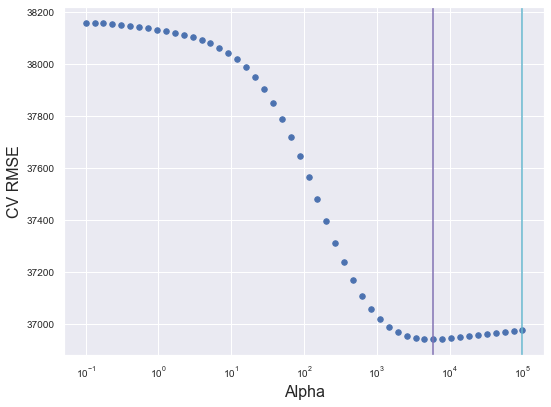

In [66]:
# plot alpha VS RMSE
range_alpha = rr_cv.cv_results_['param_alpha'].data
MSE_scores = rr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='ridge',
                                       results=rr_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV RMSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
#plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [67]:
# the best parameter
print(rr_cv.best_params_)
# the best score
print(rr_cv.best_score_)

{'alpha': 5963.623316594637}
-36941.61495150938


In [68]:
train_X.columns

Index(['DOM', 'LP', 'SqFt', 'BR', 'Bth', 'GarSp', 'HOA_Fee', 'Age',
       'Week_in_month_Accept_Date', 'Week_in_month_Listing_Date', 'BT_CO',
       'BT_SFH', 'BT_TH', 'Gar_N', 'Gar_N/A', 'Gar_Y', 'Freq_A', 'Freq_M',
       'Freq_N/A', 'Area_All Other Counties/States', 'Area_Almaden Valley',
       'Area_Alum Rock', 'Area_Berryessa', 'Area_Blossom Valley',
       'Area_Cambrian', 'Area_Campbell', 'Area_Central San Jose',
       'Area_Cupertino', 'Area_Evergreen', 'Area_Santa Clara County',
       'Area_Santa Teresa', 'Area_South San Jose', 'Area_Willow Glen',
       'Zip_95002', 'Zip_95110', 'Zip_95111', 'Zip_95112', 'Zip_95113',
       'Zip_95116', 'Zip_95117', 'Zip_95118', 'Zip_95119', 'Zip_95120',
       'Zip_95121', 'Zip_95122', 'Zip_95123', 'Zip_95124', 'Zip_95125',
       'Zip_95126', 'Zip_95127', 'Zip_95128', 'Zip_95129', 'Zip_95130',
       'Zip_95131', 'Zip_95132', 'Zip_95133', 'Zip_95134', 'Zip_95135',
       'Zip_95136', 'Zip_95138', 'Zip_95139', 'Zip_95140', 'Zip_95148',
 

In [69]:
#using best ridge to predict
predict_y = rr_cv.predict(test_X)
print('OSR2 of ridge regression', OSR2(train_y,test_y,predict_y))
print('RMSE of ridge regression', RMSE(test_y,predict_y))
print('MAE of ridge regression', MAE(test_y,predict_y))

OSR2 of ridge regression 0.9003945542804599
RMSE of ridge regression 58602.61990882112
MAE of ridge regression 38097.741781381854


In [70]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 100000.0


In [71]:
#using one std rule to predict
rr_cv_std = GridSearchCV(rr, {'alpha': [x_1se]}, scoring='neg_root_mean_squared_error', cv=10)
rr_cv_std.fit(train_X, train_y)
predict_y = rr_cv_std.predict(test_X)
print('OSR2 of ridge regression', OSR2(train_y,test_y,predict_y))
print('RMSE of ridge regression', RMSE(test_y,predict_y))
print('MAE of ridge regression', MAE(test_y,predict_y))

OSR2 of ridge regression 0.9011930917479474
RMSE of ridge regression 58367.23841465742
MAE of ridge regression 38007.49694625855


### Part III - Lasso

In [72]:
#grid search for alpha in lasso
alpha_grid = {'alpha': np.logspace(-1, 5, num=50, base=10)}
lasso = Lasso(random_state=88)
lasso_cv = GridSearchCV(lasso, alpha_grid, scoring='neg_root_mean_squared_error', cv=10)
lasso_cv.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=Lasso(random_state=88),
             param_grid={'alpha': array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1...
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])},
             scoring='neg_root_mean_squared_error')

In [73]:
print(lasso_cv.best_params_)

{'alpha': 471.48663634573944}


In [74]:
print(lasso_cv.best_score_)

-36935.38274769798


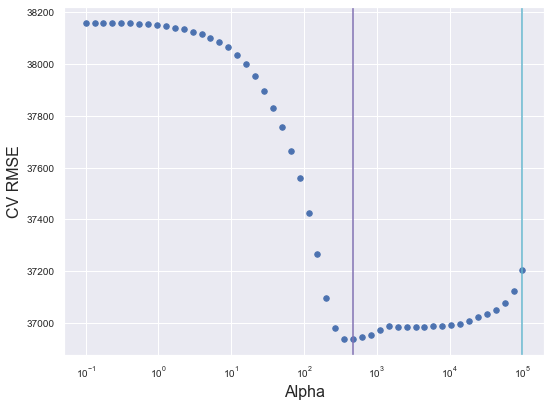

In [75]:
#plot
range_alpha = lasso_cv.cv_results_['param_alpha'].data
MSE_scores = lasso_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV RMSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
#plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [76]:
#using best Lasso to predict
predict_y = lasso_cv.predict(test_X)
print('OSR2 of Lasso', OSR2(train_y,test_y,predict_y))
print('RMSE of Lasso', RMSE(test_y,predict_y))
print('MAE of Lasso', MAE(test_y,predict_y))

OSR2 of Lasso 0.9002133859933611
RMSE of Lasso 58655.89065571138
MAE of Lasso 37841.83098223326


In [77]:
print('Alpha one standard error rule:', x_1se)
#using one std rule to predict
lasso_cv = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_root_mean_squared_error', cv=10)
lasso_cv.fit(train_X, train_y)
predict_y = lasso_cv.predict(test_X)
print('OSR2 of Lasso', OSR2(train_y,test_y,predict_y))
print('RMSE of Lasso', RMSE(test_y,predict_y))
print('MAE of Lasso', MAE(test_y,predict_y))

Alpha one standard error rule: 100000.0
OSR2 of Lasso 0.899157513248575
RMSE of Lasso 58965.402029297155
MAE of Lasso 38258.43291216023


### Part IV - CART

In [78]:
# import package of CART
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

We are using CART model to predict the house value by tuning hyper-parameters with cross validation.

In [79]:
y_test = test_y
X_test = test_X
y_train = train_y
X_train = train_X

In [80]:
#Exhaustive search over specified parameter values for an estimator.

grid_values = {'ccp_alpha': np.linspace(0.0, 10000000, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [100],
               'random_state': [88]} 
            
dtr = DecisionTreeRegressor()
dtr_cv_rmse = GridSearchCV(dtr, param_grid = grid_values, scoring =  'neg_root_mean_squared_error', cv=10, verbose=1) 

dtr_cv_rmse.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([       0.,    50000.,   100000.,   150000.,   200000.,   250000.,
         300000.,   350000.,   400000.,   450000.,   500000.,   550000.,
         600000.,   650000.,   700000.,   750000.,   800000.,   850000.,
         900000.,   950000.,  1000000.,  1050000.,  1100000.,  1150000.,
        1200000.,  1250000.,  1300000.,  1350000.,  1400000.,  1450000.,
        1500000.,  1550000.,  1600...
        8700000.,  8750000.,  8800000.,  8850000.,  8900000.,  8950000.,
        9000000.,  9050000.,  9100000.,  9150000.,  9200000.,  9250000.,
        9300000.,  9350000.,  9400000.,  9450000.,  9500000.,  9550000.,
        9600000.,  9650000.,  9700000.,  9750000.,  9800000.,  9850000.,
        9900000.,  9950000., 10000000.]),
                         'max_depth': [100], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='neg

In [81]:
rmse = (-1) *dtr_cv_rmse.cv_results_['mean_test_score'] 
ccp = dtr_cv_rmse.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation RMSE': rmse}).head(20)

,ccp alpha,Validation RMSE
0,0.0,40183.683245
1,50000.0,40183.405185
2,100000.0,40173.963669
3,150000.0,40137.195073
4,200000.0,40083.557985
5,250000.0,39994.701606
6,300000.0,39915.814673
7,350000.0,39879.426900
8,400000.0,39840.926969
9,450000.0,39752.593486


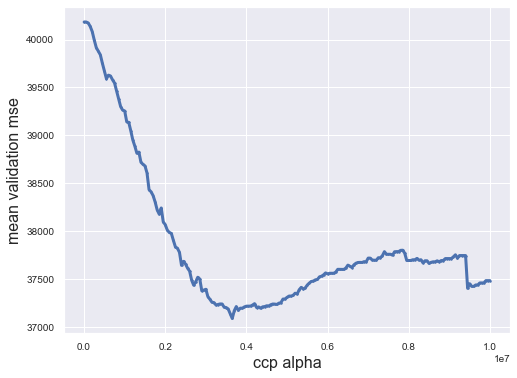

In [82]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation mse', fontsize=16)
plt.scatter(ccp, rmse, s=2)
plt.plot(ccp, rmse, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [83]:
print('Grid best parameter ccp_alpha (min RMSE): ', dtr_cv_rmse.best_params_['ccp_alpha'])
print('Grid best score (RMSE): ', dtr_cv_rmse.best_score_)

Grid best parameter ccp_alpha (min RMSE):  3650000.0
Grid best score (RMSE):  -37088.39114388564


Node count = 111


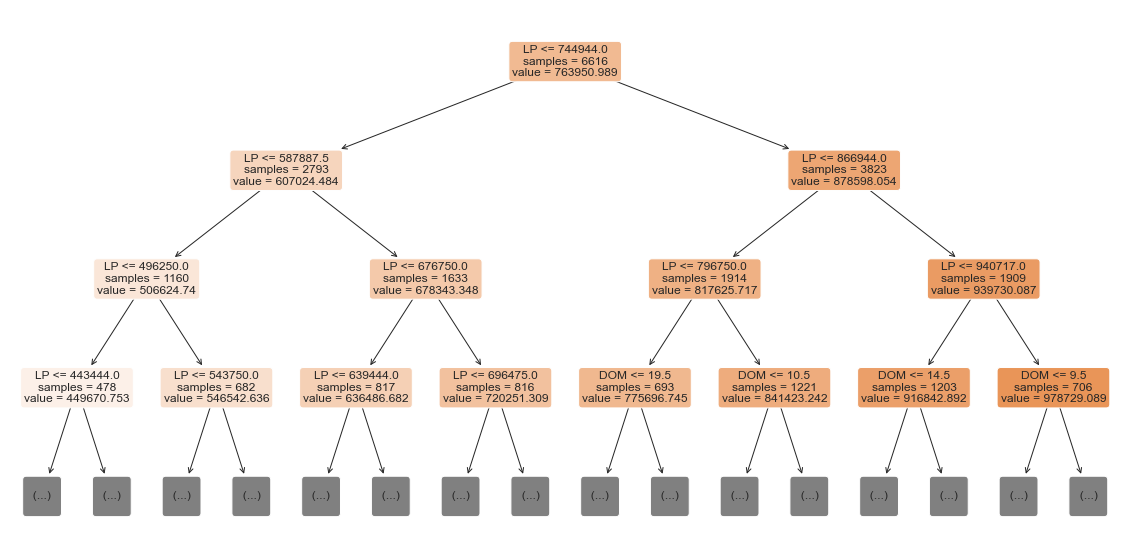

In [84]:
print('Node count =', dtr_cv_rmse.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtr_cv_rmse.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [85]:
# print the best parameter
print(dtr_cv_rmse.best_params_)

# print feature importance
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100 * dtr_cv_rmse.best_estimator_.feature_importances_}).round(2).head()

{'ccp_alpha': 3650000.0, 'max_depth': 100, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}


,Feature,Importance score
0,DOM,1.29
1,LP,98.36
2,SqFt,0.09
3,BR,0.02
4,Bth,0.00


In [86]:
# predict test set using best model we get
y_pred = dtr_cv_rmse.best_estimator_.predict(X_test)

In [87]:
# calculate OSR2, RMSE, and MAE for random forest
print('OSR2 of CART', OSR2(y_train, y_test,y_pred))
print('RMSE of CART', RMSE(y_test, y_pred))
print('MAE of CART', MAE(y_test, y_pred))

OSR2 of CART 0.9063061771344793
RMSE of CART 56836.9768993388
MAE of CART 37761.23364563633


In [88]:
import pickle
filename = 'CART.sav'
pickle.dump(dtr_cv_rmse.best_estimator_,open(filename,'wb'))

### Part V - Random Forest

In [89]:
# import package for random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [90]:
x_train = X_train
x_test = X_test

In [91]:
# grid search for best parameter
grid_values = {'max_features': np.linspace(1,56,56, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

In [92]:
# build random forest model
rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid = grid_values, scoring='neg_root_mean_squared_error', cv=5)
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='neg_root_mean_squared_error')

(1.0, 56.0)

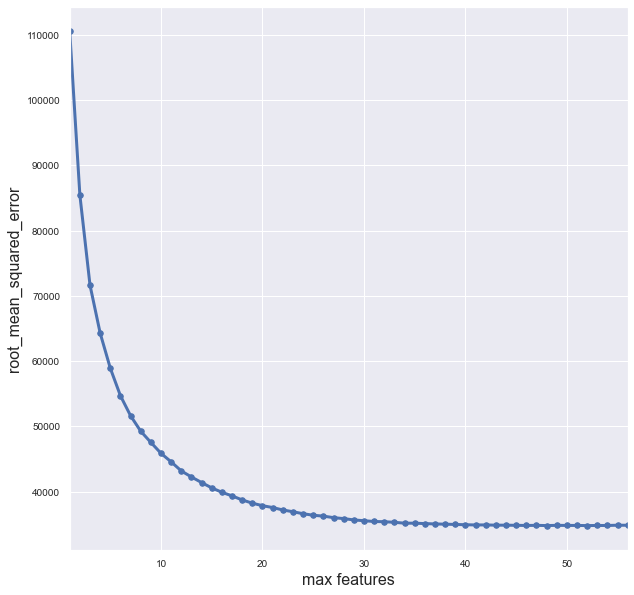

In [93]:
# plot mrse coressonding to different max features
max_features = rf_cv.cv_results_['param_max_features'].data
mrse = (-1) * rf_cv.cv_results_['mean_test_score']

plt.xlabel('max features', fontsize=16)
plt.ylabel('root_mean_squared_error', fontsize=16)
plt.scatter(max_features, mrse, s=30)
plt.plot(max_features, mrse, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 56])

In [94]:
# print the best parameter
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'max_features': 52, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}
-34812.836420547836


In [95]:
# print feature importance
imp = pd.DataFrame({'Feature' : x_train.columns, 
              'Importance score': 100 * rf_cv.best_estimator_.feature_importances_}).round(1)

# print 10 highest inportance score of features
imp = imp.sort_values(by = 'Importance score', ascending = False).reset_index(drop = True).loc[0:10,:]

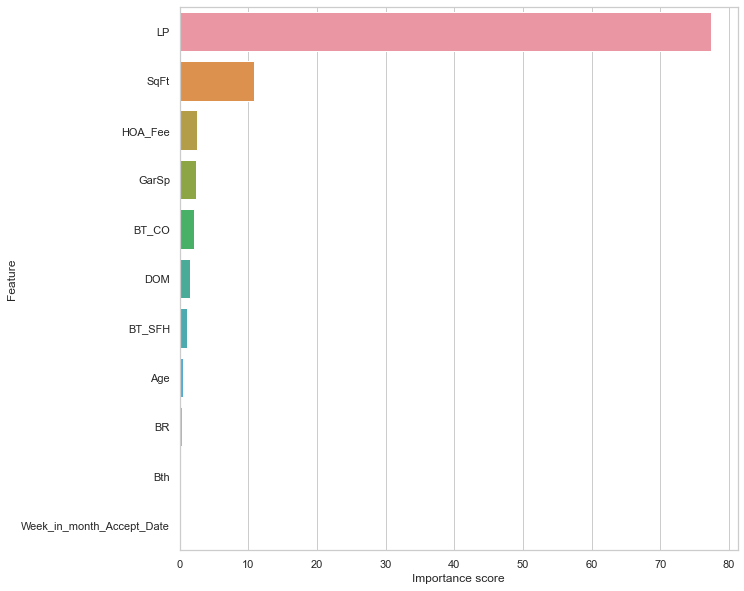

In [96]:
# plot a barplot of feature importance
import seaborn as sns
sns.set_theme(style = "whitegrid")
ax = sns.barplot(x = "Importance score", y = "Feature", data = imp)

In [97]:
# predict test set using best model we get
y_test = test['SP']
y_pred = rf_cv.best_estimator_.predict(x_test)
y_pred

array([910811.07977557, 846407.30654092, 830997.2388509 , ...,
       727291.85803034, 673588.68184025, 700598.56139206])

In [98]:
# calculate OSR2, RMSE, and MAE for random forest
print('OSR2', OSR2(y_train, y_test,y_pred))
print('RMSE', RMSE(y_test, y_pred))
print('MAE', MAE(y_test, y_pred))

OSR2 0.9044135960886053
RMSE 57408.15004823853
MAE 37285.038752232584


In [99]:
import pickle
filename = 'RF.sav'
pickle.dump(rf_cv.best_estimator_,open(filename,'wb'))

### Part VI - Boosting

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import time

In [101]:
# grid search for max_leaf_nodes and n_estimators
grid_values = {'max_leaf_nodes': [3,6,9],
               'min_samples_leaf': [10],
               'n_estimators': [500,1000,1500,2000,2500],
               'learning_rate': [0.01],
               'random_state': [88]}

tic = time.time()

gbr = GradientBoostingRegressor()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values, scoring = 'neg_root_mean_squared_error', cv=5, n_jobs = -1)
gbr_cv.fit(x_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 236.16 s


In [102]:
# print best estimator
print(gbr_cv.best_params_)

{'learning_rate': 0.01, 'max_leaf_nodes': 3, 'min_samples_leaf': 10, 'n_estimators': 1000, 'random_state': 88}


In [112]:
# print best estimator
print(gbr_cv.best_score_)

-34690.748875021214


In [103]:
# predict model
predict_y = gbr_cv.predict(x_test)
test_y = y_test

# print data performance
print('OSR2 of boosting', OSR2(y_train,test_y,predict_y))
print('RMSE of boosting', RMSE(test_y,predict_y))
print('MAE of boosting', MAE(test_y,predict_y))

OSR2 of boosting 0.8972932909139157
RMSE of boosting 59507.93740051498
MAE of boosting 38369.47010657604


In [104]:
import pickle
filename = 'boosting.sav'
pickle.dump(gbr_cv.best_estimator_,open(filename,'wb'))

# Model Evaluation

In [105]:
# define function of MAE and Wrapper
def MAE_percent(y_test, y_pred):
    
    return np.mean(abs(y_test - y_pred)/y_test)

def wrapper(y_train, y_test, y_pred, metric):
    if metric == 'OSR':
        return OSR2(y_train, y_test, y_pred)
    if metric == 'RMSE':
        return RMSE(y_test, y_pred)
    if metric == 'MAE':
        return MAE(y_test, y_pred)
    if metric == 'MAE%':
        return MAE_percent(y_test, y_pred)

In [106]:
# predict each model using test set
#y_pre_ols is already define in the model building section
y_pred_ridge = rr_cv_std.predict(test_X)
y_pred_lasso = lasso_cv.predict(test_X)
y_pred_dtr = dtr_cv_rmse.predict(X_test)
y_pred_rf = rf_cv.predict(x_test)
y_pred_gbr = gbr_cv.predict(x_test)

In [107]:
# baseline model: use mean SP in trainset to predict y in testset
y_pred_base = [y_train.mean()]*len(test)

In [108]:
# compile predictions across all models into one dataframe
models = ['baseline','OLS Regression','Ridge Regression','Lasso Regression','CART','Random Forest','Gradient Boosting']
pred_df = pd.DataFrame(np.transpose([y_pred_base, y_pred_ols,y_pred_ridge,y_pred_lasso, y_pred_dtr, y_pred_rf, y_pred_gbr]))
pred_df.columns = models

In [109]:
# generate metrics table

metric_lst = ['OSR','RMSE','MAE','MAE%']

metric_df = pd.DataFrame(columns = metric_lst)

for model in models:
    for metric in metric_lst:
        metric_df.loc[model, metric] = wrapper(train_y, test_y, pred_df[model].values, metric)

metric_df

,OSR,RMSE,MAE,MAE%
baseline,0.0,185684.43074,157477.378599,0.223894
OLS Regression,0.895167,60120.783822,40174.510453,0.047599
Ridge Regression,0.901193,58367.238415,38007.496946,0.044727
Lasso Regression,0.899158,58965.402029,38258.432912,0.044752
CART,0.906306,56836.976899,37761.233646,0.045042
Random Forest,0.904414,57408.150048,37285.038752,0.044053
Gradient Boosting,0.897293,59507.937401,38369.470107,0.044852


In [110]:
# taking LP as baseline
for metric in metric_lst:
    print(metric+': '+str(wrapper(train_y, test_y, test['LP'].values, metric)))

OSR: 0.8672017403758719
RMSE: 67666.1835224605
MAE: 44311.6455399061
MAE%: 0.05126992172754633
